In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/new_modified_dataset.csv')
# List of columns to scale
columns_to_scale = ['Grad', 'HSC', 'SSC']

# Divide each column by 2 to scale from 20 to 10
df[columns_to_scale] = df[columns_to_scale] / 2

# Optional: Round the values to eliminate any floating-point issues
df[columns_to_scale] = df[columns_to_scale].round(2)

df.head()

,Base Pay,Job Role,Skills,Base Pay Range,sex,age,Mother_education,Father_education,Mother_job,Father_job,studytime,backlogs,tuition,pursue_higher_studies,Internet_usage,absences,SSC,HSC,Grad
0,72000,Teacher,"Subject Knowledge, Communication, Patience, Cr...",30000-40000,Male,27,2,1,Health,Public,2,0,Yes,Yes,No,0,5.0,5.5,6.0
1,50000,Salesperson,"Communication, Negotiation, Customer Service, ...",20000-30000,Male,20,1,0,Public,Health,4,0,Yes,No,Yes,3,5.0,5.5,6.0
2,38000,Salesperson,"Communication, Negotiation, Customer Service, ...",20000-30000,Male,24,3,0,Teacher,Teacher,3,1,No,Yes,No,12,7.5,8.0,8.5
3,72000,Engineer,"Technical Skills, Mathematics, Project Managem...",40000-50000,Male,26,0,2,Health,Public,3,0,No,Yes,Yes,11,7.0,8.0,8.5
4,65000,Engineer,"Technical Skills, Mathematics, Project Managem...",40000-50000,Male,26,0,2,Public,Health,1,1,Yes,Yes,Yes,5,7.0,7.5,8.0


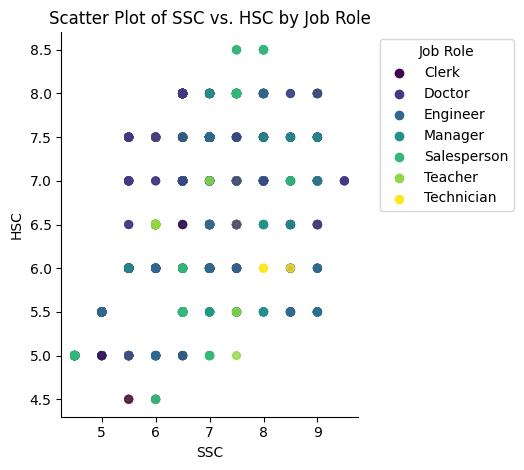

In [ ]:
job_role_categories = pd.Categorical(df['Job Role'])
job_role_codes = job_role_categories.codes
job_role_names = job_role_categories.categories

# Create the scatter plot using job role codes for color mapping
scatter = plt.scatter(x=df['SSC'], y=df['HSC'],
                      c=job_role_codes,
                      cmap='viridis',
                      s=32, alpha=.8)

# Customize plot appearance
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('SSC')
plt.ylabel('HSC')
plt.title('Scatter Plot of SSC vs. HSC by Job Role')

for role_code, role_name in enumerate(job_role_names):
    plt.scatter([], [], color=scatter.cmap(scatter.norm(role_code)), label=role_name)
plt.legend(title='Job Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()


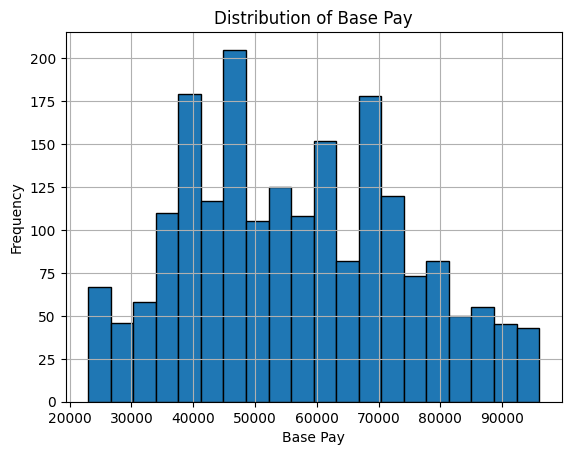

In [ ]:
df['Base Pay'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Base Pay')
plt.xlabel('Base Pay')
plt.ylabel('Frequency')
plt.show()

<ipython-input-5-81334bad51fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Job Role', y='Base Pay', palette='viridis')


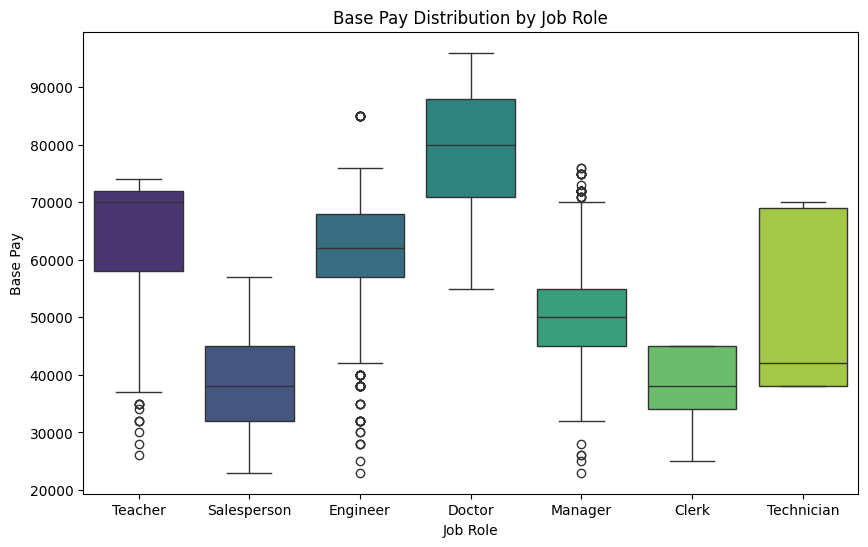

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Job Role', y='Base Pay', palette='viridis')
plt.title('Base Pay Distribution by Job Role')
plt.show()

<ipython-input-6-b37f067712f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Job Role', y='HSC', palette='viridis')


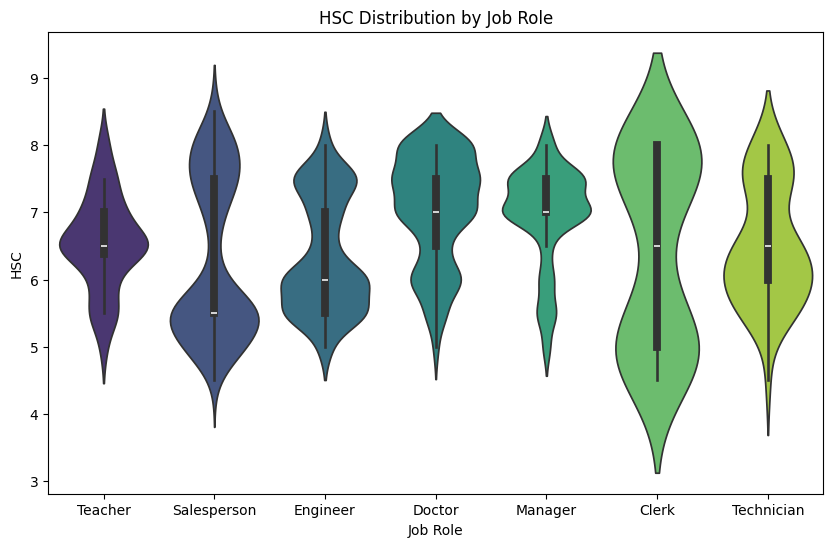

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Job Role', y='HSC', palette='viridis')
plt.title('HSC Distribution by Job Role')
plt.show()

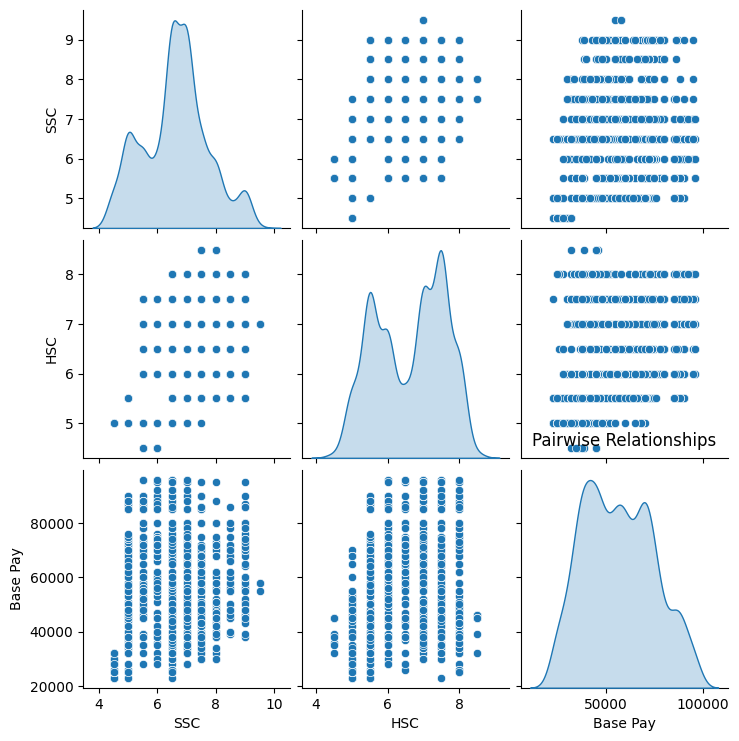

In [ ]:
sns.pairplot(df[['SSC', 'HSC', 'Base Pay']], diag_kind='kde')
plt.title('Pairwise Relationships')
plt.show()

<ipython-input-8-1bdf2e4f01df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Job Role', y='Base Pay', palette='viridis')


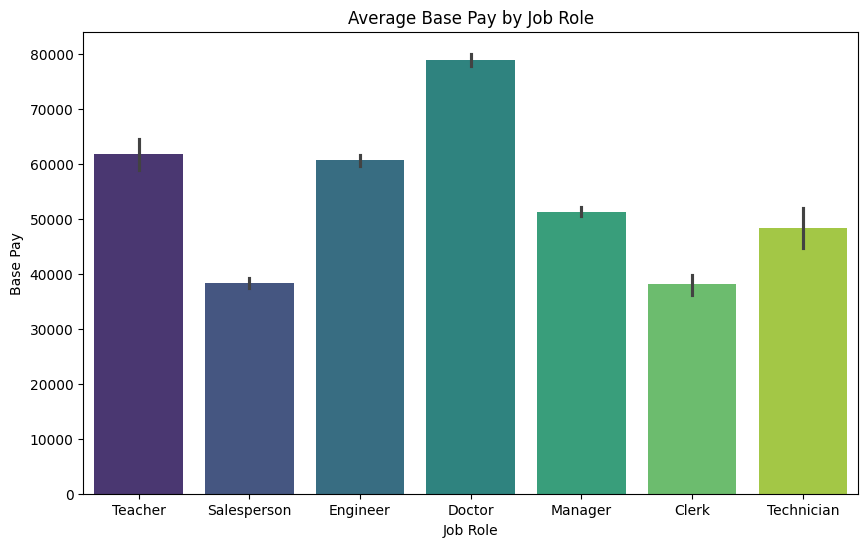

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Job Role', y='Base Pay', palette='viridis')
plt.title('Average Base Pay by Job Role')
plt.show()

In [ ]:
df.columns

Index(['Base Pay', 'Job Role', 'Skills', 'Base Pay Range', 'sex', 'age',
       'Mother_education', 'Father_education', 'Mother_job', 'Father_job',
       'studytime', 'backlogs', 'tuition', 'pursue_higher_studies',
       'Internet_usage', 'absences', 'SSC', 'HSC', 'Grad'],
      dtype='object')

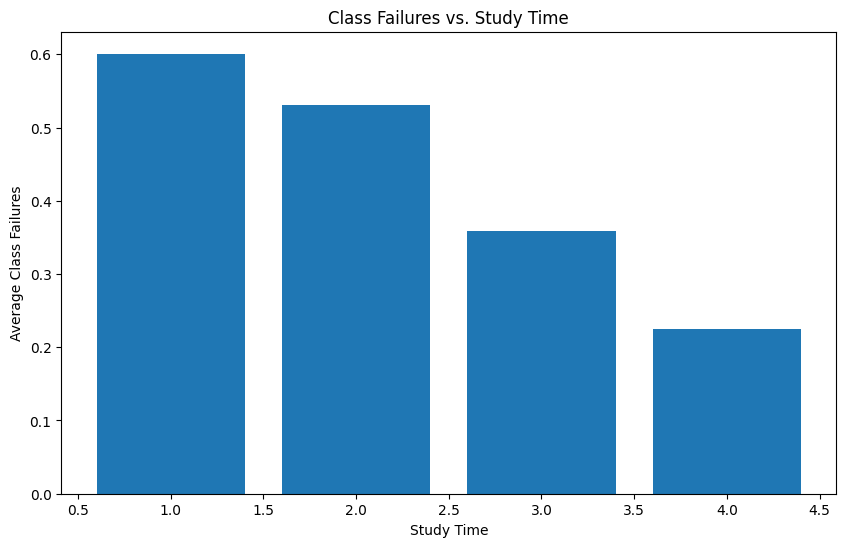

In [ ]:
study_time_groups = df.groupby('studytime')['backlogs'].mean()

plt.figure(figsize=(10, 6))
plt.bar(study_time_groups.index, study_time_groups.values)
plt.xlabel('Study Time')
plt.ylabel('Average Class Failures')
_ = plt.title('Class Failures vs. Study Time')

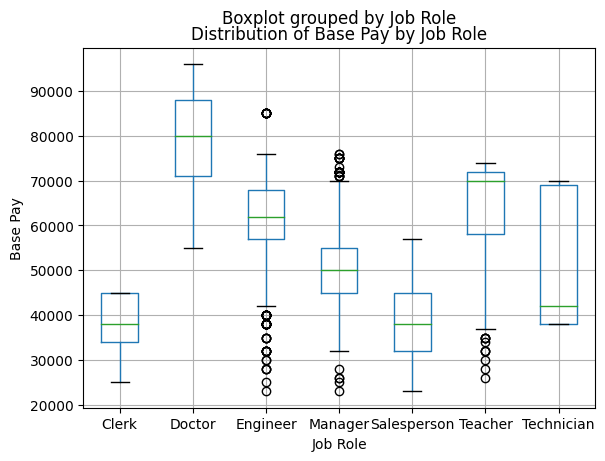

In [ ]:
df.boxplot(column='Base Pay', by='Job Role')
plt.xlabel('Job Role')
plt.ylabel('Base Pay')
_ = plt.title('Distribution of Base Pay by Job Role')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Base Pay               2000 non-null   int64  
 1   Job Role               2000 non-null   object 
 2   Skills                 2000 non-null   object 
 3   Base Pay Range         2000 non-null   object 
 4   sex                    2000 non-null   object 
 5   age                    2000 non-null   int64  
 6   Mother_education       2000 non-null   int64  
 7   Father_education       2000 non-null   int64  
 8   Mother_job             2000 non-null   object 
 9   Father_job             2000 non-null   object 
 10  studytime              2000 non-null   int64  
 11  backlogs               2000 non-null   int64  
 12  tuition                2000 non-null   object 
 13  pursue_higher_studies  2000 non-null   object 
 14  Internet_usage         2000 non-null   object 
 15  abse

In [ ]:
df.describe()

,Base Pay,age,Mother_education,Father_education,studytime,backlogs,absences,SSC,HSC,Grad
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,56594.500000,25.849000,1.407500,1.451000,2.133000,0.475500,6.365500,6.619750,6.631250,7.39625
std,17880.350198,2.426962,1.041627,0.937571,1.000906,0.508457,3.563602,1.099723,0.965072,0.96932
min,23000.000000,20.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.500000,4.500000,5.50000
25%,42000.000000,24.000000,1.000000,1.000000,1.000000,0.000000,3.000000,6.000000,5.500000,6.50000
50%,55000.000000,26.000000,1.000000,1.000000,2.000000,0.000000,6.000000,6.500000,7.000000,7.50000
75%,70000.000000,28.000000,2.000000,2.000000,3.000000,1.000000,9.000000,7.000000,7.500000,8.00000
max,96000.000000,31.000000,3.000000,3.000000,4.000000,2.000000,15.000000,9.500000,8.500000,9.50000


In [ ]:
df.isnull().sum()

,0
Base Pay,0
Job Role,0
Skills,0
Base Pay Range,0
sex,0
age,0
Mother_education,0
Father_education,0
Mother_job,0
Father_job,0


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()

# for column in df.columns:
#   if df[column].dtype == 'object':  # Check if the column is categorical
#     df[column] = label_encoder.fit_transform(df[column])

In [ ]:
# df.head()

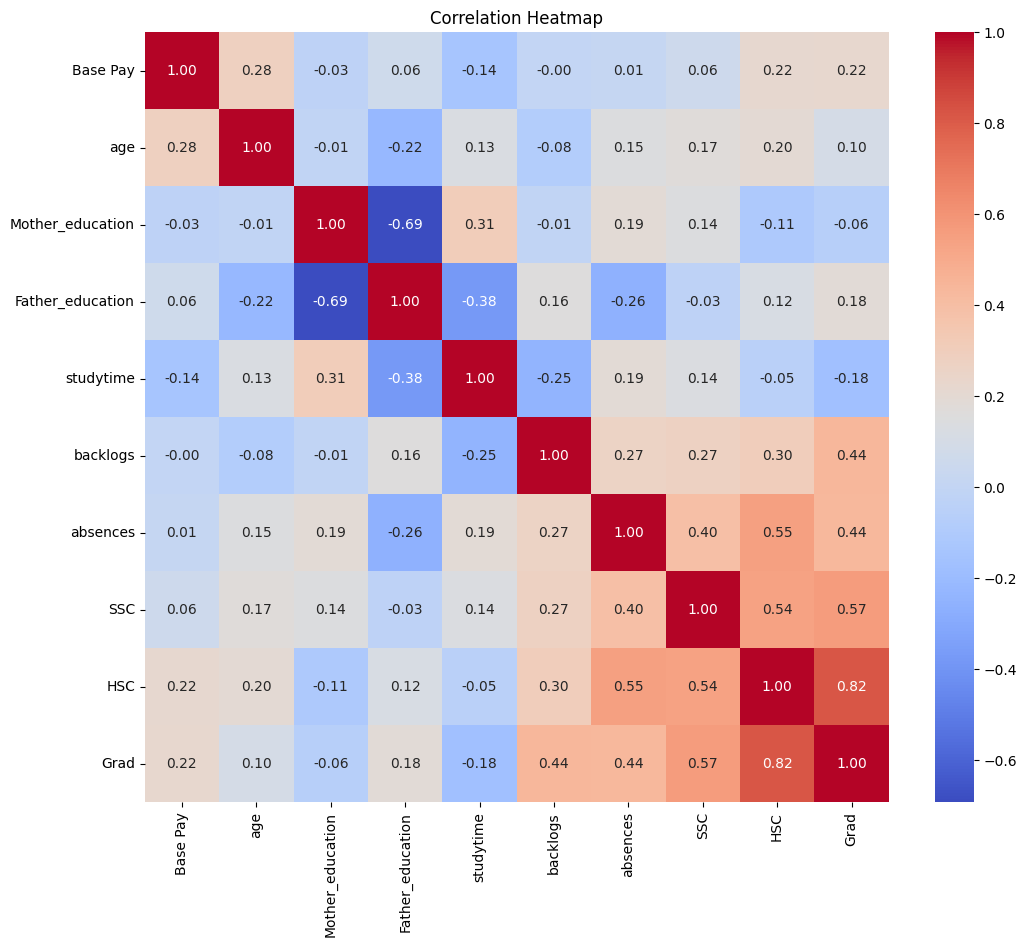

In [ ]:
numerical_df = df.select_dtypes(include=np.number)

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
df.duplicated().value_counts()

,count
False,1488
True,512


In [ ]:
df['Job Role'].value_counts()

,count
Job Role,
Engineer,472
Salesperson,460
Manager,449
Doctor,425
Teacher,108
Technician,49
Clerk,37


In [ ]:
df['Base Pay Range'].value_counts()

,count
Base Pay Range,
40000-50000,472
20000-30000,460
70000-90000,449
60000-80000,425
30000-40000,108
10000-20000,49
10000-15000,37


(array([ 84., 107., 151., 291., 233., 277., 315., 219., 216., 107.]),
 array([20. , 21.1, 22.2, 23.3, 24.4, 25.5, 26.6, 27.7, 28.8, 29.9, 31. ]),
 <BarContainer object of 10 artists>)

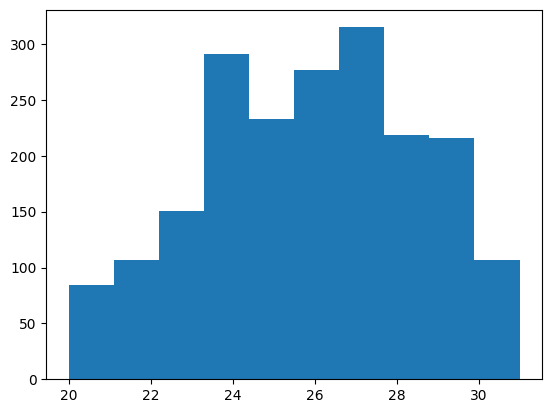

In [ ]:
plt.hist(df['age'])

<Axes: xlabel='age', ylabel='Density'>

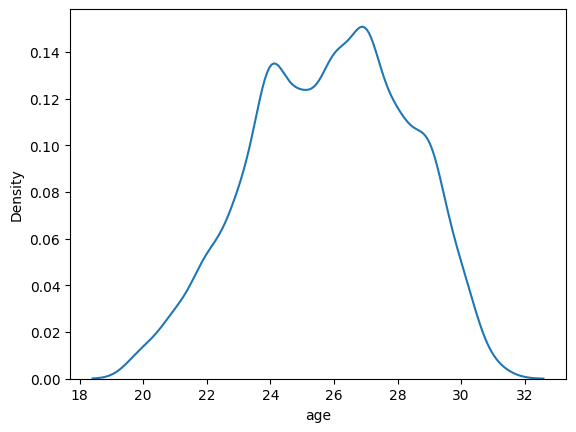

In [ ]:
sns.kdeplot(df['age'])

<Axes: xlabel='backlogs', ylabel='count'>

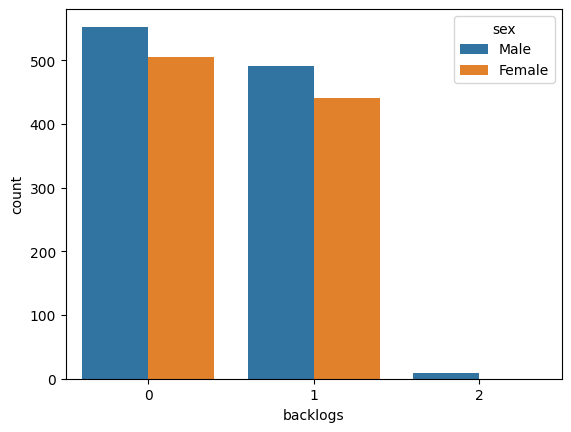

In [ ]:
sns.countplot(data=df, x="backlogs", hue="sex")

<Axes: xlabel='sex', ylabel='count'>

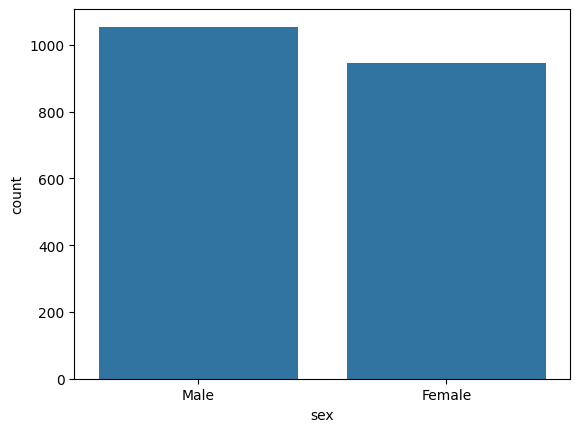

In [ ]:
sns.countplot(data=df, x="sex")

<Axes: xlabel='tuition', ylabel='count'>

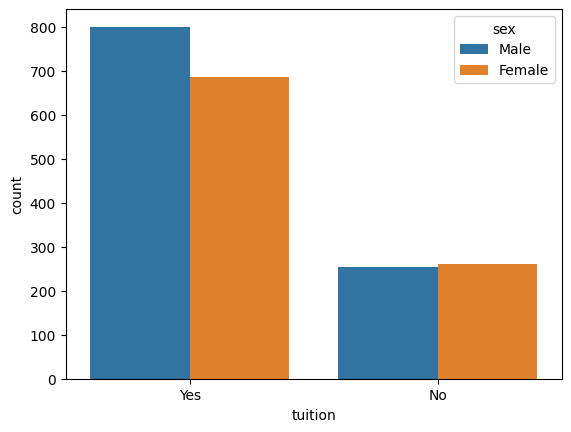

In [ ]:
sns.countplot(data=df, x="tuition", hue="sex")

In [ ]:
df.columns

Index(['Base Pay', 'Job Role', 'Skills', 'Base Pay Range', 'sex', 'age',
       'Mother_education', 'Father_education', 'Mother_job', 'Father_job',
       'studytime', 'backlogs', 'tuition', 'pursue_higher_studies',
       'Internet_usage', 'absences', 'SSC', 'HSC', 'Grad'],
      dtype='object')

<Axes: xlabel='pursue_higher_studies', ylabel='count'>

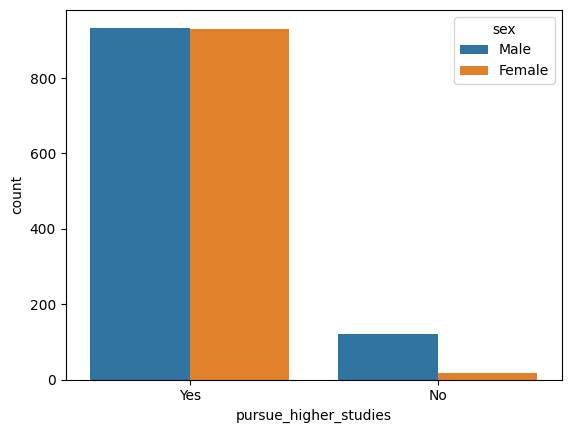

In [ ]:
sns.countplot(data=df, x="pursue_higher_studies", hue="sex")

<Axes: xlabel='studytime', ylabel='count'>

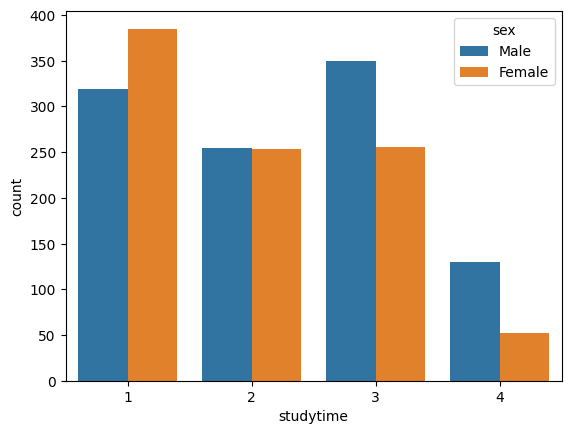

In [ ]:
sns.countplot(data=df, x="studytime", hue="sex")

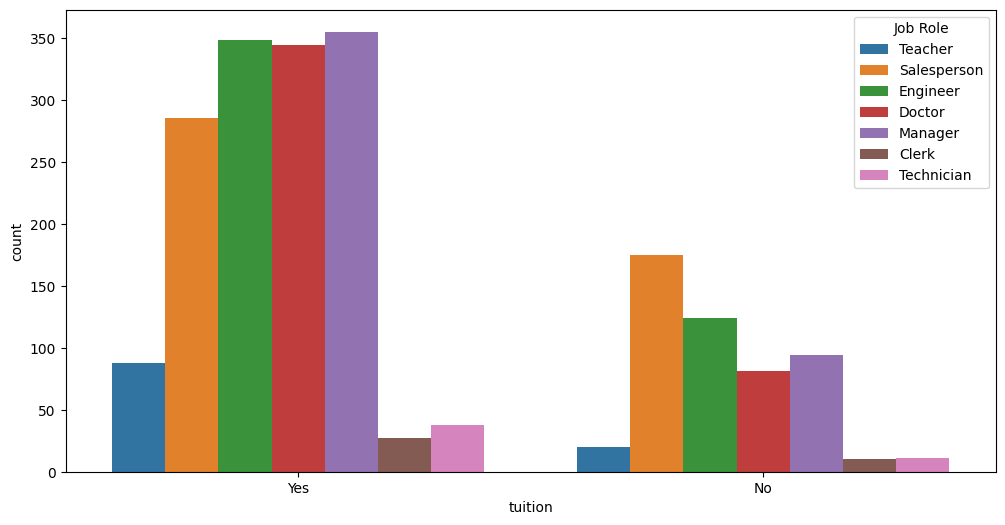

In [ ]:
plt.figure(figsize=(12, 6))

# Create the countplot
sns.countplot(data=df, x="tuition", hue="Job Role")

# Show the plot
plt.show()

<Axes: xlabel='Job Role', ylabel='count'>

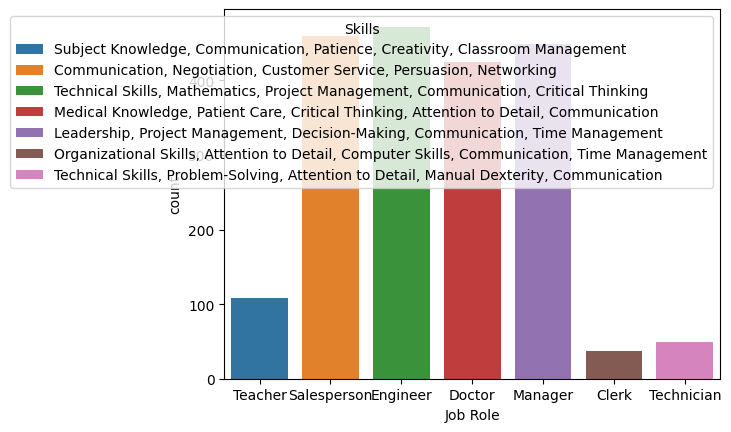

In [ ]:
sns.countplot(data=df, x="Job Role", hue="Skills")

<Axes: xlabel='tuition', ylabel='count'>

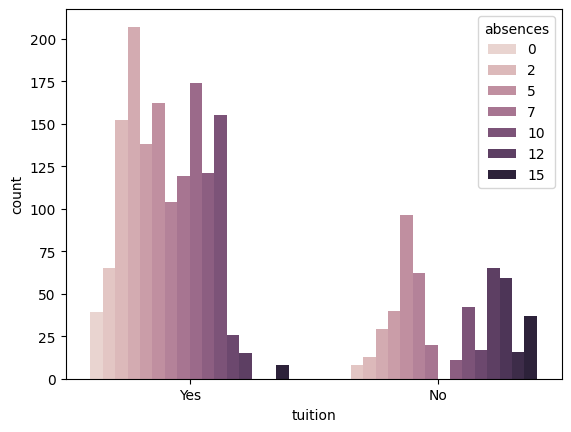

In [ ]:
sns.countplot(data=df, x="tuition", hue="absences")

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Job Role'] = le.fit_transform(df['Job Role'])

In [ ]:
label_encoder = LabelEncoder()

for column in df.columns:
  if df[column].dtype == 'object':  # Check if the column is categorical
    df[column] = label_encoder.fit_transform(df[column])

# PREDICTING JOB ROLE BASED ON STUDENT DEMOGRAPHICS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = df.drop(columns=['Job Role'])
y = df['Job Role']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00        93
           4       1.00      1.00      1.00        96
           5       1.00      1.00      1.00        29
           6       1.00      1.00      1.00        12

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


Confusion Matrix:
[[ 9  0  0  0  0  0  0]
 [ 0 82  0  0  0  0  0]
 [ 0  0 79  0  0  0  0]
 [ 0  0  0 93  0  0  0]
 [ 0  0  0  0 96  0  0]
 [ 0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0 12]]


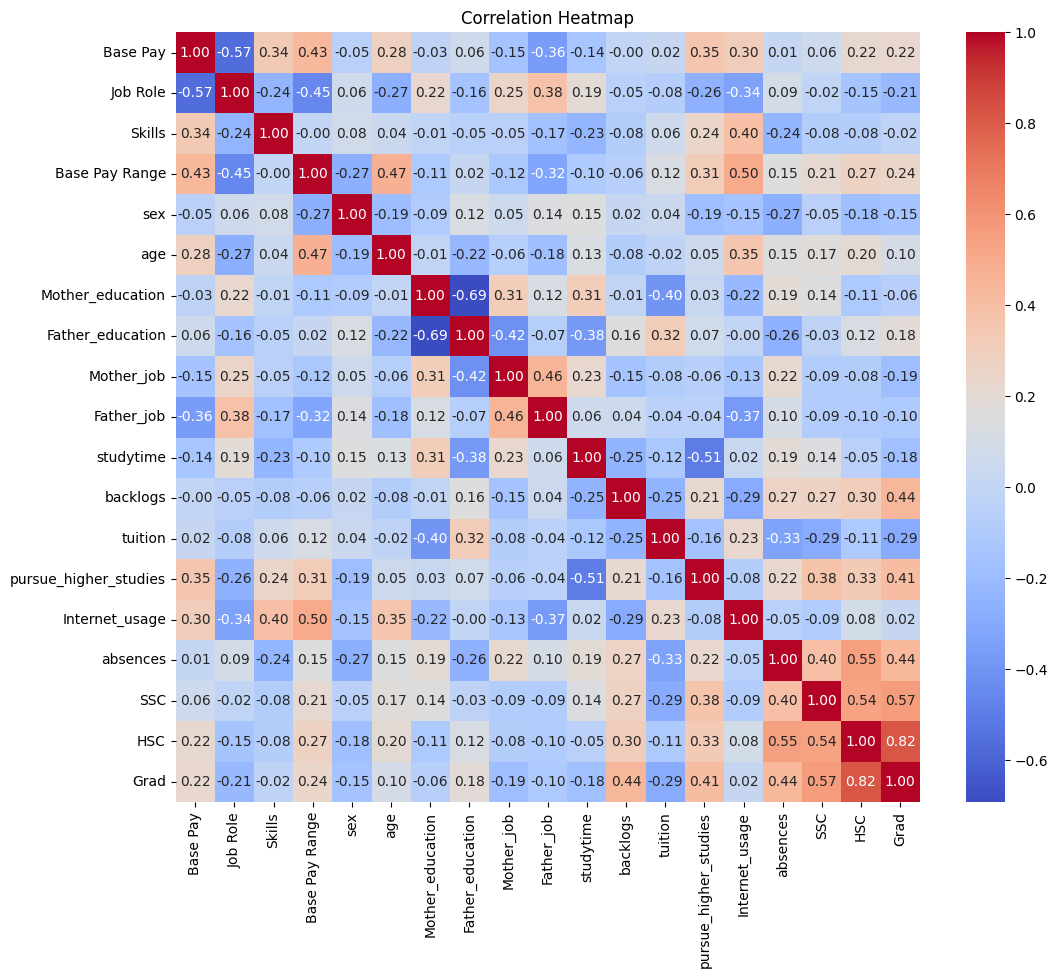

In [ ]:
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
df.shape

(2000, 19)

# PREDICTING THE MONTHLY INCOME BASED ON VARIOUS STUDENT DEMOGRAPHIES

In [ ]:
df.columns

Index(['Base Pay', 'Job Role', 'Skills', 'Base Pay Range', 'sex', 'age',
       'Mother_education', 'Father_education', 'Mother_job', 'Father_job',
       'studytime', 'backlogs', 'tuition', 'pursue_higher_studies',
       'Internet_usage', 'absences', 'SSC', 'HSC', 'Grad'],
      dtype='object')

In [ ]:
X1 = df.drop(columns=['Base Pay Range'])
y1 = df['Base Pay Range']

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2)

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the model
rf_classifier.fit(X_train1, y_train1)

RandomForestClassifier()

In [ ]:
# Predict on the test set
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the model
rf_classifier.fit(X_train1, y_train1)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test1, y_pred1)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("\nClassification Report:")
print(classification_report(y_test1, y_pred1))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test1, y_pred1))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        85
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00       100
           5       1.00      1.00      1.00        92
           6       1.00      1.00      1.00        91

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


Confusion Matrix:
[[ 10   0   0   0   0   0   0]
 [  0   7   0   0   0   0   0]
 [  0   0  85   0   0   0   0]
 [  0   0   0  15   0   0   0]
 [  0   0   0   0 100   0   0]
 [  0   0   0   0   0  92   0]
 [  0   0   0   0   0   0  91]]


# PREDICTING GRADUATION MARKS

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Recalculate VIF after ensuring data is clean and numeric
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"]  = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

                  Feature         VIF
18                   Grad  242.578630
17                    HSC  210.758367
5                     age   95.155822
16                    SSC   84.359774
13  pursue_higher_studies   39.498286
0                Base Pay   22.294241
3          Base Pay Range   17.866512
14         Internet_usage   15.111155
10              studytime   13.044033
15               absences    9.681854
8              Mother_job    9.511199
7        Father_education    9.180028
1                Job Role    8.365285
6        Mother_education    6.842893
12                tuition    6.028220
9              Father_job    5.543742
2                  Skills    4.751360
11               backlogs    3.045521
4                     sex    2.810284


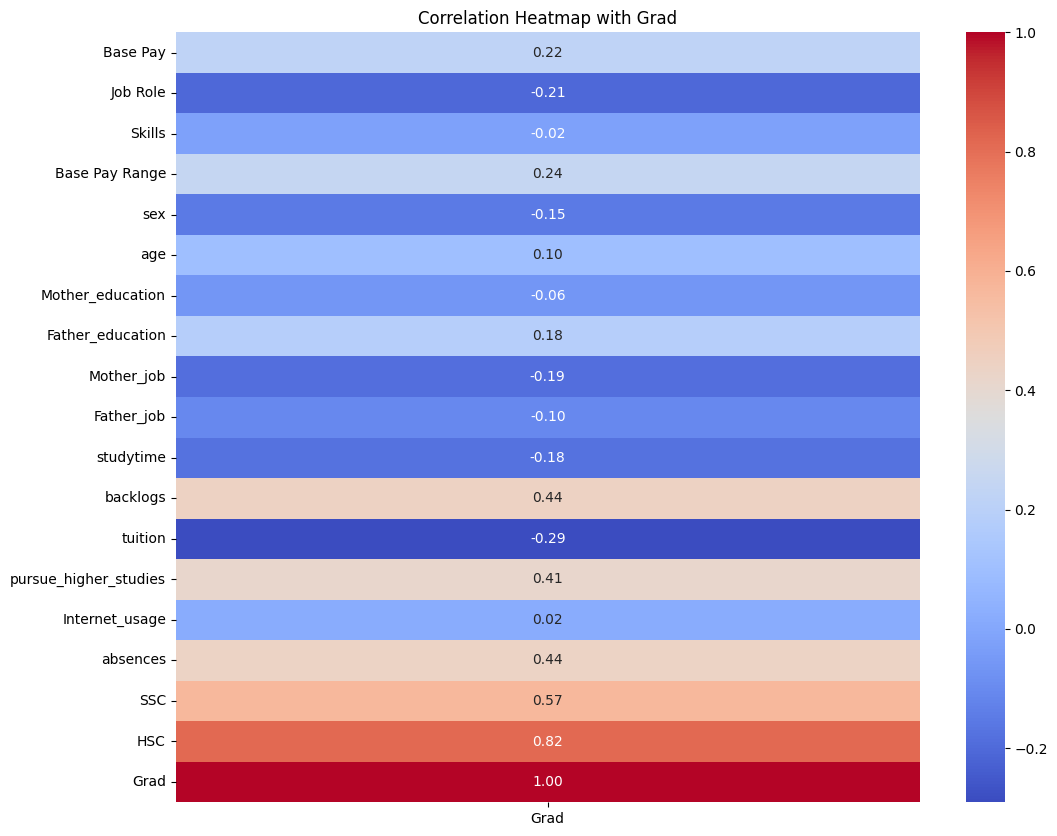

In [ ]:
corr_matrix = df.corr()
# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['Grad']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Grad')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X2 = df[['backlogs', 'pursue_higher_studies', 'absences', 'SSC', 'HSC']]
y2 = df['Grad']

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train2, y_train2)

# Make predictions
y_pred2 = model.predict(X_test2)

# Evaluate the model
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test2, y_pred2)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Optional: Display model coefficients
coefficients = pd.DataFrame(model.coef_, X2.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)

Mean Squared Error: 0.24
Root Mean Squared Error: 0.49
R-squared: 0.74

Model Coefficients:
                       Coefficient
backlogs                  0.356183
pursue_higher_studies     0.412162
absences                 -0.021408
SSC                       0.115470
HSC                       0.702105


Inferences from the Data Analysis:
Correlation Between SSC and HSC Performance:

Inference: Students who perform well in SSC tend to also perform well in HSC, indicating that early academic success is a strong predictor of future academic performance. This correlation suggests that consistent academic diligence from early education stages can influence career trajectories positively.
Salary Distribution Across Job Roles:

Inference: The majority of jobs have a salary below ₹50,000, with the exception of the doctor profession, which is the highest-paying, typically earning above ₹90,000. This highlights the financial benefits of pursuing a career in medicine.
Impact of Study Time on Academic Success:

Inference: Students with less study time have a higher likelihood of failing their classes. This underscores the importance of dedicating sufficient time to studies to ensure academic success.
Age Demographics of Students:

Inference: The data shows that the majority of students are 27 years old, which may reflect a common age for graduate studies or early career stages.
Gender Differences in Academic Challenges:

Inference: Males tend to have more academic backlogs compared to females, suggesting potential differences in study habits or academic support structures.
Advice: Interventions aimed at improving time management and study skills could be particularly beneficial for male students.
Equal Aspiration for Higher Education:

Inference: Both male and female students are equally inclined to pursue higher education, showing no significant gender disparity in the aspiration for advanced studies.
Advice: Support systems should be equally accessible to both genders to encourage and facilitate their pursuit of higher education.
Gender Differences in Study Time:

Inference: Females tend to have less study time compared to males. This could be due to various factors such as additional responsibilities or different study strategies.
Advice: Female students may benefit from targeted resources and time management strategies to optimize their study schedules.
Effect of Tuition on Job Prospects:

Inference: Students who attend tuition classes after school have a higher likelihood of securing good jobs, indicating that additional academic support can enhance career prospects.
Advice: Students should consider supplementary education options, such as tuition, to strengthen their understanding of key subjects and improve their employability.
Impact of Tuition on Absences:

Inference: Students who attend tuition classes tend to have more absences compared to those who do not. This could be a trade-off between additional learning and regular attendance.
Advice: Students attending tuition should manage their time effectively to minimize absences and maintain regular school attendance.
Skill Sets and Corresponding Job Roles:

Inference: The data indicates that certain skill sets are strongly associated with specific job roles:
Engineer: Technical Skills, Mathematics, Project Management, Communication, Critical Thinking.
Salesperson: Communication, Negotiation, Customer Service, Persuasion, Networking.
Manager: Leadership, Project Management, Decision-Making, Communication, Time Management.
Doctor: Medical Knowledge, Patient Care, Critical Thinking, Attention to Detail, Communication.
Teacher: Subject Knowledge, Communication, Patience, Creativity, Classroom Management.
Technician: Technical Skills, Problem-Solving, Attention to Detail, Manual Dexterity, Communication.
Clerk: Organizational Skills, Attention to Detail, Computer Skills, Communication, Time Management.
Advice: Students should focus on developing the specific skills that align with their desired job roles. This targeted skill development can significantly enhance their employability and job performance.
Random Forest Model Performance:

Inference: The Random Forest model achieved 100% accuracy in predicting both job roles and base pay range using all columns, indicating that the model is highly effective in making these predictions based on the provided features.
Advice: The strong performance of the Random Forest model suggests that students' educational backgrounds, skill sets, and other factors can accurately predict their career outcomes. Students should aim to excel across these dimensions to improve their job prospects and salary potential.
Linear Regression Model for Graduation Marks:

Inference: The Linear Regression model, using features like backlogs, higher study aspirations, absences, SSC, and HSC, achieved an R-squared value of 0.74, indicating a strong predictive power for graduation marks.
Advice: Students should minimize backlogs and absences while maintaining high SSC and HSC scores to maximize their graduation marks. Aspiring to pursue higher studies also appears to positively impact academic performance.
Advice for Students to Secure a High-Paying Job and Have a Successful Career:
Academic Consistency: Maintaining strong academic performance from SSC through HSC is crucial, as it sets the foundation for future success.
Skill Development: Focus on developing the skills most relevant to your desired career path. For example, aspiring engineers should hone their technical and mathematical abilities, while those aiming for managerial roles should develop leadership and project management skills.
Supplementary Education: Consider attending tuition or additional classes to strengthen your knowledge base, but balance it with regular school attendance to avoid excessive absences.
Time Management: Efficient time management is key to minimizing backlogs and ensuring sufficient study time, especially for students who may have additional responsibilities or lower study times.
Higher Education Aspiration: Cultivate a strong desire for higher education, as it not only improves graduation marks but also enhances long-term career prospects.
Gender-Specific Support: Both male and female students should seek resources and support systems tailored to their unique challenges, such as time management or overcoming academic backlogs.